## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
!pip install xlrd -U


In [2]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [3]:
#loading the data (online)
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", 
                        sheet_name=0, skiprows= 1, header = 0)

#loading the data (local)
#dataset = pd.read_excel("./default of credit card clients.xls", 
#                        sheet_name=0, skiprows= 1, header = 0)

#dataset.columns = dataset.iloc[0]
#dataset.drop(['ID'], axis=1, inplace=True)


In the following, you can take a look into the dataset.

In [4]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [5]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
#from graphviz import Source
from sklearn import tree

In [6]:
TARGET = "default payment next month"

columns_predictors = [col for col in dataset.columns if col not in [TARGET]]
columns_categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]

X = dataset[columns_predictors]
y = dataset[TARGET]

display(X)
display(y)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29999,80000,1,3,1,41,1,-1,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (24000, 24)
X_test.shape: (6000, 24)
y_train.shape: (24000,)
y_test.shape: (6000,)


In [8]:
display(X_train)
display(y_train)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
23833,23834,80000,2,3,1,50,2,3,2,2,...,2321,4247,3914,3242,0,0,2001,4,1073,23076
27012,27013,500000,1,1,1,43,0,0,0,0,...,129576,129863,120781,98163,4567,4787,4745,4256,3321,3326
12496,12497,60000,2,1,2,31,0,-1,2,2,...,111,411,261,6695,900,0,300,0,6500,0
25519,25520,280000,2,2,2,34,-1,-1,2,-1,...,32800,131200,3950,0,34163,0,131200,3950,0,716
18880,18881,400000,2,1,2,30,-2,-2,-1,-1,...,3222,21755,15258,16002,2668,3222,21755,500,1000,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,3229,50000,2,2,1,26,0,0,0,0,...,42332,37872,35748,33631,2228,2500,1660,1457,1300,1340
18273,18274,70000,1,2,3,47,0,0,0,2,...,34578,33723,35156,37370,2000,6000,0,2000,2784,0
1548,1549,500000,2,1,2,42,-1,-1,-1,2,...,844,614,2887,3850,1844,1000,0,3000,4000,6000
7576,7577,50000,1,2,2,30,0,0,0,0,...,26829,18948,18830,19358,1489,1326,642,2000,824,1000


23833    0
27012    0
12496    0
25519    0
18880    0
        ..
3228     0
18273    1
1548     1
7576     1
13416    0
Name: default payment next month, Length: 24000, dtype: int64

In [9]:
#Define the pipeline(s)

In [10]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder #specific transformations we want to use in our pipelines

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(handle_unknown="ignore")),
])

pipeline_numerical = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical),
  ("numerical", pipeline_numerical, columns_numerical),
])

In [11]:
pipeline_full

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1',
                                  'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                                  'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6'])])

In [12]:
#Apply the pieline

In [13]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (24000, 92)
X_test_transformed.shape: (6000, 92)


In [14]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc

In [15]:
data_mod = dataset[(dataset.SEX != 0) & (dataset.EDUCATION != 0) & (dataset.MARRIAGE != 0) & (dataset.AGE != 0)]
train, test = train_test_split(data_mod, test_size=0.2)
print(data_mod.shape)
print(train.shape)
print(test.shape)

(29932, 25)
(23945, 25)
(5987, 25)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from sklearn import tree

dtc_model_1 = DecisionTreeClassifier(max_depth=15, criterion='entropy', min_samples_split=2, min_samples_leaf=1)
dtc_model_1.fit(X_train, y_train)

dtc_model_2 = DecisionTreeClassifier(max_depth=15, criterion='gini', min_samples_split=2, min_samples_leaf=1)
dtc_model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [17]:
features = columns_numerical
#features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', \
#            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', \
#            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', \
#            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5','PAY_AMT6']

target = TARGET

classifiers = [
    knnc(),
    dtc_model_1,
    dtc_model_2,
    dtc(),
    SVC(),
    #####SVC(kernel='linear'),
    gnb(),
    rfc()
]
classifier_names = [
    'K nearest neighbors',
    'DTC_model_1_entrophy',
    'DTC_model_2_gini',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    #####'SVM classifier with linear kernel',
    'Gaussian Naive Bayes',
    'Random Forest Classifier'
]

In [18]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    print(clf_name, 'mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors mean accuracy:  74.897 % std:  0.001 %
DTC_model_1_entrophy mean accuracy:  75.131 % std:  0.002 %
DTC_model_2_gini mean accuracy:  74.613 % std:  0.001 %
Decision Tree Classifier mean accuracy:  69.806 % std:  0.004 %
SVM classifier with RBF kernel mean accuracy:  77.828 % std:  0.0 %
Gaussian Naive Bayes mean accuracy:  36.496 % std:  0.018 %
Random Forest Classifier mean accuracy:  78.747 % std:  0.003 %


In [19]:
# Observation: The above cross value score comparison is telling DTC is not the highest score, but having hyper 
# parameter tuned, just DTC itself, entrophy scored better than gini.


In [20]:
# Classification: Decision Tree (entrophy vs gini)

In [21]:
final_model_entropy = dtc_model_1.fit(train[features], train[target])
final_model_gini = dtc_model_2.fit(train[features], train[target])

In [22]:
y_test = test['default payment next month'].to_frame()
X_test=test.drop(['default payment next month'], axis=1)

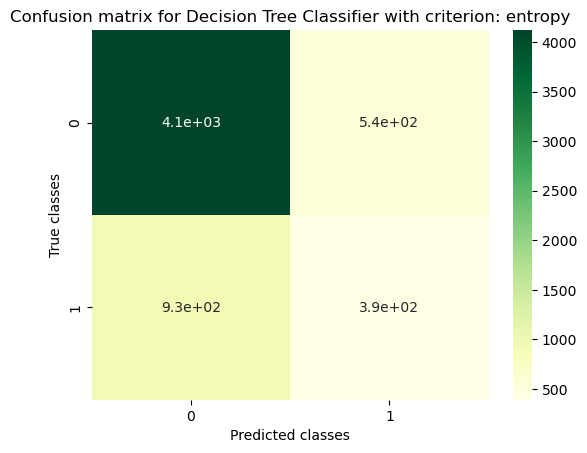

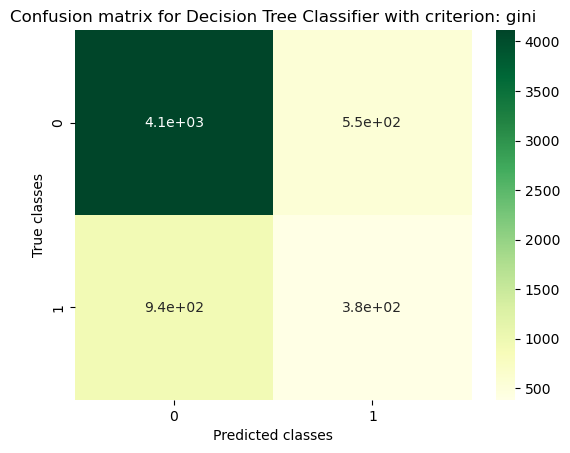

In [23]:
y_hat_entropy = final_model_entropy.predict(test[features])
y_hat_gini = final_model_gini.predict(test[features])

#print('test accuracy for RF classifier with criterion entropy:'\
#      , round(accuracy_score(test[target], y_hat_entropy)*100, 2), '%')
plt.title('Confusion matrix for Decision Tree Classifier with criterion: entropy')
sns.heatmap(confusion_matrix(test[target], y_hat_entropy), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

#print('test accuracy for RF classifier with criterion gini:', \
#      round(accuracy_score(test[target], y_hat_gini)*100, 2),'%')
plt.title('Confusion matrix for Decision Tree Classifier with criterion: gini')
sns.heatmap(confusion_matrix(test[target], y_hat_gini), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()


In [24]:
#Observations 1= postive, 0= Negative
#(0,0)=TN
#(0,1)=FP
#(1,0)=FN
#(1,1)=TP
#
# 0 | TN | FP |
#   |----+----|
# 1 | FN | TP |
#      0    1

# Precision = TP / (TP + FP)
# Recall =    TP / (TP + FN)

# Entrophy:
# Precision= 390 / (390 + 540) = 0.42
# Recall   = 390 / (390 + 930) = 0.30

# Gini:
# Precision= 380 / (380 + 550) = 0.41
# Recall   = 380 / (380 + 940) = 0.29

#Overvation: when we increase the max_depth: from 5 to 15, we see the "cross_val_score" and "confusion matrix values" 
# spreaded wider between entrophy and gini

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [25]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a dictionary of hyperparameters to test
param_dist = {
    'criterion': ['entropy'],
    'max_depth': np.arange(3, 15)
}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()  # (min_samples_split=2, min_samples_leaf=1)

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, random_state=123)

# Fit it to your data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and the best score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")

Tuned Decision Tree Parameters: {'max_depth': 3, 'criterion': 'entropy'}
CPU times: total: 26.7 s
Wall time: 26.7 s


In [26]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Create a dictionary of hyperparameters to test
param_dist = {
    'criterion': ['gini'],
    'max_depth': np.arange(3, 15)
}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, random_state=123)

# Fit it to your data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and the best score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")

Tuned Decision Tree Parameters: {'max_depth': 3, 'criterion': 'gini'}
CPU times: total: 21.7 s
Wall time: 21.6 s


In [27]:
#Observation: by using RandomizedSearchCV, Gini always has a shortner run time than Entrophy.

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [28]:
%%time

#Random Forest Classifier_1
#class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8221666666666667
CPU times: total: 5.66 s
Wall time: 907 ms


In [29]:
%%time

#Random Forest Classifier_2

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=100, criterion='entropy', max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.818
CPU times: total: 16.3 s
Wall time: 2.5 s


In [30]:
%%time

#Random Forest Classifier_3

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=100, criterion='gini', max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8138333333333333
CPU times: total: 13.4 s
Wall time: 2.02 s


In [31]:
%%time

#AdaBoost_1
#class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)[source]

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=400,
    algorithm="SAMME.R", learning_rate=1.0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8186666666666667
CPU times: total: 34.7 s
Wall time: 34.6 s


In [32]:
%%time

#AdaBoost_2
#class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)[source]

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8181666666666667
CPU times: total: 16.8 s
Wall time: 16.8 s


In [33]:
%%time

#Extra Trees Classifier_1
#class sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest = ExtraTreesClassifier(n_estimators=5)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7835
CPU times: total: 344 ms
Wall time: 342 ms


In [34]:
%%time

#Extra Trees Classifier_2

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8171666666666667
CPU times: total: 5.47 s
Wall time: 5.48 s


In [35]:
%%time

#Extra Trees Classifier_3

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8161666666666667
CPU times: total: 5.47 s
Wall time: 5.47 s


In [36]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# We train the first stump 
reg1 = DecisionTreeRegressor(max_depth=1).fit(X, y)
y2 = y - reg1.predict(X) 
print("Residual Error for the first predictor: " + str(mean_squared_error(reg1.predict(X),y)) )

reg2 = DecisionTreeRegressor(max_depth=1).fit(X, y2)
y3 = y2 - reg2.predict(X)
print("Residual Error for the second predictor: " + 
      str(mean_squared_error(sum(reg.predict(X) for reg in (reg1, reg2)), y)) )

reg3 = DecisionTreeRegressor(max_depth=1).fit(X, y3)
y4 = y3 - reg3.predict(X)
print("Residual Error for the Gradeiet Boosting Algorithm: " + 
      str(mean_squared_error(sum(reg.predict(X) for reg in (reg1, reg2, reg3)), y))  
     )

reg4 = DecisionTreeRegressor(max_depth=1).fit(X, y4)
y5 = y4 - reg4.predict(X)
print("Residual Error for the Gradeiet Boosting Algorithm: " + 
      str(mean_squared_error(sum(reg.predict(X) for reg in (reg1, reg2, reg3, reg4)), y))  
     )

Residual Error for the first predictor: 0.14606263417162982
Residual Error for the second predictor: 0.14280418046723334
Residual Error for the Gradeiet Boosting Algorithm: 0.14133478131296245
Residual Error for the Gradeiet Boosting Algorithm: 0.14039394347372053


In [37]:
%%time

#Gradient Boosted Trees_1
#class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)[source]

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn import ensemble

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbes = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_depth=100)
gbes.fit(X_train, y_train)
mean_squared_error(gbes.predict(X_test), y_test)

CPU times: total: 38.4 s
Wall time: 38.4 s


0.2614369920377858

In [38]:
%%time

#Gradient Boosted Trees_2

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn import ensemble

X_train, X_test, y_train, y_test = train_test_split(X, y)

gbes = ensemble.GradientBoostingRegressor(n_estimators=100)
gbes.fit(X_train, y_train)
mean_squared_error(gbes.predict(X_test), y_test)

CPU times: total: 21.6 s
Wall time: 21.6 s


0.13293021726594184

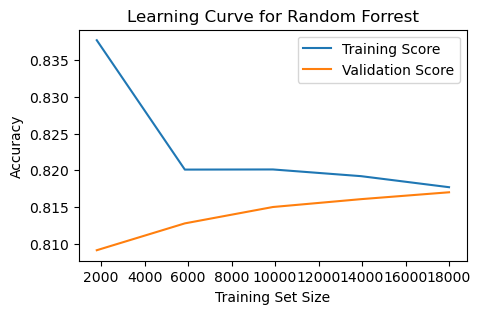

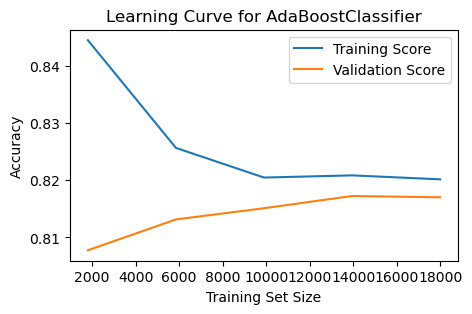

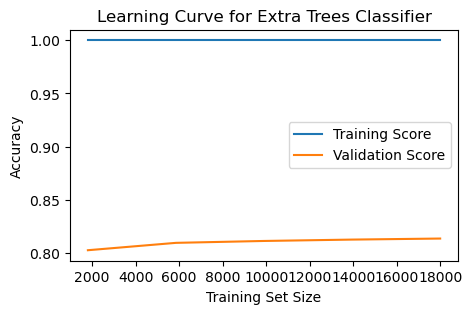

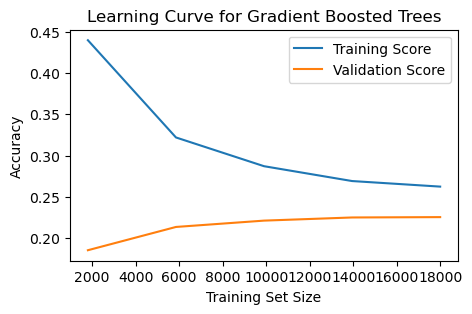

In [39]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def myLearningCurvePlot(myClassifier, myObj):
    
    train_sizes, train_scores, validation_scores = learning_curve(
        myObj, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
    )

    plt.figure(figsize=(5, 3))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(validation_scores, axis=1), label='Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {myClassifier}')
    plt.legend()
    plt.show()
    
myLearningCurvePlot("Random Forrest", rnd_clf)    
myLearningCurvePlot("AdaBoostClassifier", ada_clf) 
myLearningCurvePlot("Extra Trees Classifier", forest) 
myLearningCurvePlot("Gradient Boosted Trees", gbes) 

#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

In [40]:
# How does changing hyperparms effect model performance?
#
# Decision Tree Classifier
# Hyperparameters: max_depth, min_samples_split, and min_samples_leaf
# (default vs entrophy vs gini)
# gini runs best
#
# *Random Forest:
#-Hyperparameters:
#  Key hyperparameters include the number of trees (n_estimators), maximum depth of trees (max_depth), and feature selection criteria.
#-Effect on Performance:
#  Increasing n_estimators generally improves performance until a point of diminishing returns.
#  Adjusting max_depth affects the trade-off between bias and variance.
#  Feature selection criteria (e.g., Gini impurity or entropy) impact tree splits.
#
#*AdaBoost:
#-Hyperparameters:
#  n_estimators: Number of weak learners (stumps).
#  learning_rate: Controls the contribution of each stump.
#-Effect on Performance:
#  Higher n_estimators may lead to overfitting.
#  Smaller learning_rate values make the model more robust but require more stumps.
#
#*Extra Trees Classifier:
#-Hyperparameters:
#  Similar to Random Forest (e.g., n_estimators, max_depth, min_samples_leaf).
#  Extra Trees-specific hyperparameters (e.g., splitter, max_features).
#-Effect on Performance:
#  Tuning n_estimators and max_depth follows similar principles as Random Forest.
#  Extra Trees’ random feature selection can reduce overfitting.
#
#*Gradient Boosted Trees (GBTs):
#-Hyperparameters:
#  n_estimators: Number of boosting stages (trees).
#  learning_rate: Controls the contribution of each tree.
#-Effect on Performance:
#  Smaller learning_rate values require more trees for optimal performance.
#  Regularization parameters (e.g., max_depth, min_samples_leaf) impact overfitting.

#========================================================================================
# Why do you think certain models performed better/worse?
# Best is Gradient Boost fastest among all; worst is AdaBoost, it often relies on weak learners (stumps) and may not perform as well as GBTs or Random Forest in terms of accuracy.

#=========================================================================================
# How does this performance line up with known strengths/weakness of these models?

# DTC and ADA have similar score, but Ada runs longer.
# Extra Trees Classifier has a lower score but run fast.
# Gradient Boost runs longest.

#Random Forest:
#Tree Size: Random Forest uses full-sized decision trees with no predetermined depth size.
#Classification Accuracy: Random Forest is excellent at making accurate classifications. It leverages all available variables in the data table.
#Distribution of Say for Each Tree: Each tree has an equal vote on the final classification.
#Order for Constructing Trees: Trees are constructed independently of each other.
#Strengths: Robust, accurate, handles high-dimensional data, reduces overfitting.
#Weaknesses: Harder to interpret due to multiple decision paths1.

#AdaBoost (Adaptive Boosting):
#Tree Size: AdaBoost combines many “weak learners” (usually stumps) to make classifications.
#Classification Accuracy: AdaBoost uses only one variable per tree (stump), making it a weak learner. However, it often combines well with other algorithms.
#Distribution of Say for Each Tree: Some stumps have more influence on the final classification than others.
#Order for Constructing Trees: The order matters; errors from one stump influence subsequent stumps.
#Strengths: Versatile, adapts to different problem domains, works with various base classifiers.
#Weaknesses: Prone to overfitting if too many iterations1.

#Extra Trees Classifier:
#Tree Size: Similar to Random Forest, uses full-sized decision trees.
#Strengths: Reduces overfitting, faster training due to random feature selection.
#Weaknesses: Less interpretable than single decision trees.

#Gradient Boosted Trees (GBTs):
#Tree Size: GBTs combine many shallow trees (usually stumps).
#Strengths: High accuracy, handles complex relationships, robust against outliers.
#Weaknesses: Sensitive to hyperparameters, longer training time compared to single trees2.
#============================================================================================